<a href="https://colab.research.google.com/github/Ibnuamrithaher/Mechine-Learning-And-Deep-Learning/blob/main/Classification%20Evaluation/Part5%20-%20Exercise%20-%20Multiclass%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install luwiji
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 MB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.8 MB/s eta 0:00:00
  Created wheel for luwiji: filename=luwiji-1.2.3-py2.py3-none-any.whl size=41032443 sha256=8ba189ba32876501b951aabc903c412ef62cba7c50ca0819125c7e3e05f90f22
  Stored in directory: /root/.cache/pip/wheels/25/9b/68/61b665f8682276ffbc7fa54bae3ccc541be2ed103979770b9b
  Created wheel for jcopml: filename=jcopml-1.2.7-py2.py3-none-any.whl size=45916 sha256=db7d5ee0937c49ecdda5c90eb284dedea5c6561d2444a7f9094bbbf70cfa3faa
  Stored in directory: /root/.cache/pip/wheels/77/a7/60/c75983f4da5b630422325c5048591b6ee9e2ce123bf2b7b357
Successfully built luwiji jcopml


In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

## **Import Data**

In [5]:
url = "https://raw.githubusercontent.com/Ibnuamrithaher/Mechine-Learning-And-Deep-Learning/refs/heads/main/Classification%20Evaluation/Data/iris.csv"
df = pd.read_csv(url, index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.Species.value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


## **Visualize Data**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

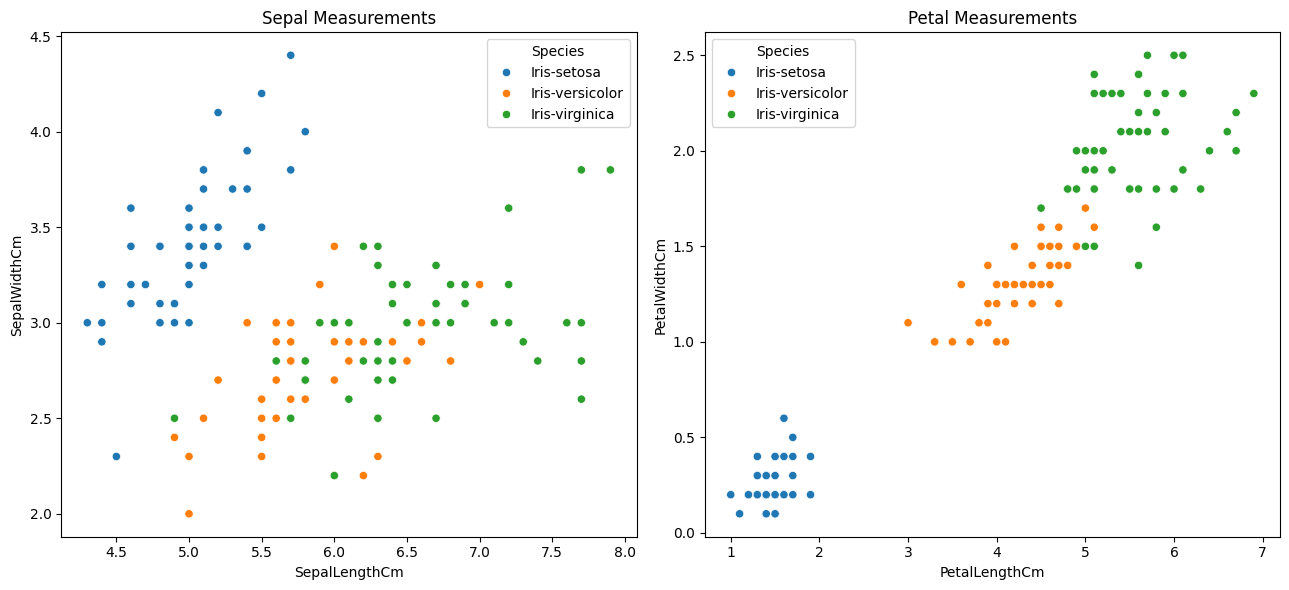

In [14]:
plt.figure(figsize=(13, 6))

# Sepal measurements scatter plot
plt.subplot(121)
sns.scatterplot(data=df,
                x="SepalLengthCm",
                y="SepalWidthCm",
                hue="Species")
plt.title("Sepal Measurements")

# Petal measurements scatter plot
plt.subplot(122)
sns.scatterplot(data=df,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")
plt.title("Petal Measurements")

plt.tight_layout()

## **Dataset Splitting**

In [15]:
X = df.drop(columns="Species")
y = df.Species

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((120, 4), (30, 4), (120,), (30,))

## **Training**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

## One vs rest / One vs All

In [18]:
preprocessor = ColumnTransformer([
    ("numeric", num_pipe(scaling='standard', transform='yeo-johnson'), X_train.columns),
])

pipeline = Pipeline([
    ("prep",preprocessor),
    ("algo",LogisticRegression(multi_class='ovr',solver="lbfgs", n_jobs=-1, random_state=42))
])

model = GridSearchCV(pipeline, gsp.logreg_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train,y_train)

#Evaluation
print(model.best_params_)
print(model.score(X_train,y_train), model.best_score_, model.score(X_test,y_test))

/usr/local/lib/python3.11/dist-packages/jcopml/pipeline/_pipeline.py:66: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'algo__C': 100.0, 'algo__fit_intercept': True}
0.975 0.9583333333333334 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


## **Multinomial**

In [19]:
preprocessor = ColumnTransformer([
    ("numeric", num_pipe(scaling='standard', transform='yeo-johnson'), X_train.columns),
])

pipeline = Pipeline([
    ("prep",preprocessor),
    ("algo",LogisticRegression(multi_class='multinomial',solver="lbfgs", n_jobs=-1, random_state=42))
])

model = GridSearchCV(pipeline, gsp.logreg_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train,y_train)

#Evaluation
print(model.best_params_)
print(model.score(X_train,y_train), model.best_score_, model.score(X_test,y_test))

/usr/local/lib/python3.11/dist-packages/jcopml/pipeline/_pipeline.py:66: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'algo__C': 1.0, 'algo__fit_intercept': True}
0.9666666666666667 0.9583333333333334 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
